In [4]:
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the data into a pandas DataFrame
df = pd.read_csv("cardio_train.csv", delimiter=';')

# Remove the id column
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

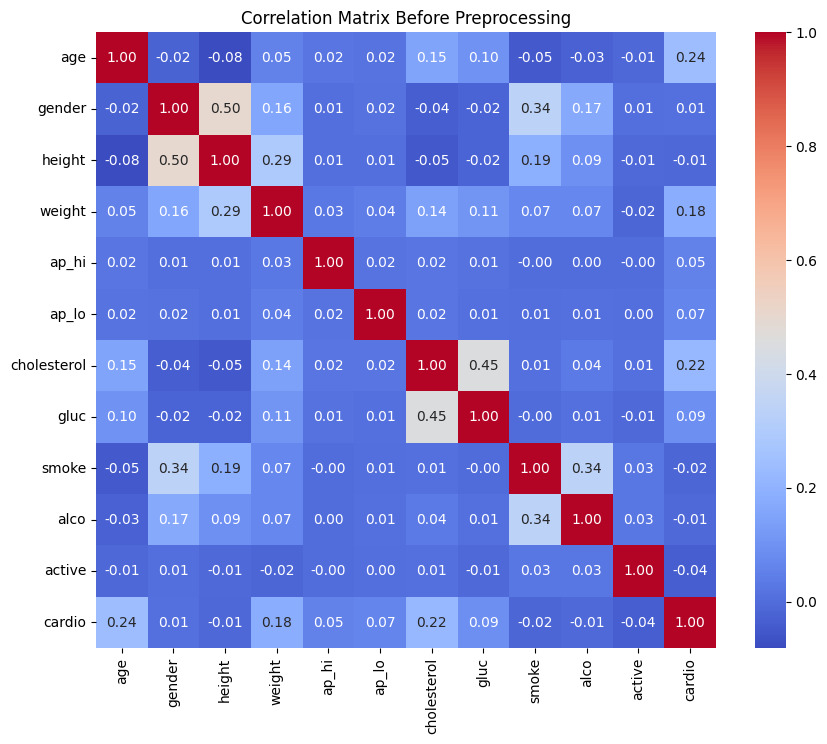

In [6]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Before Preprocessing")
plt.show()

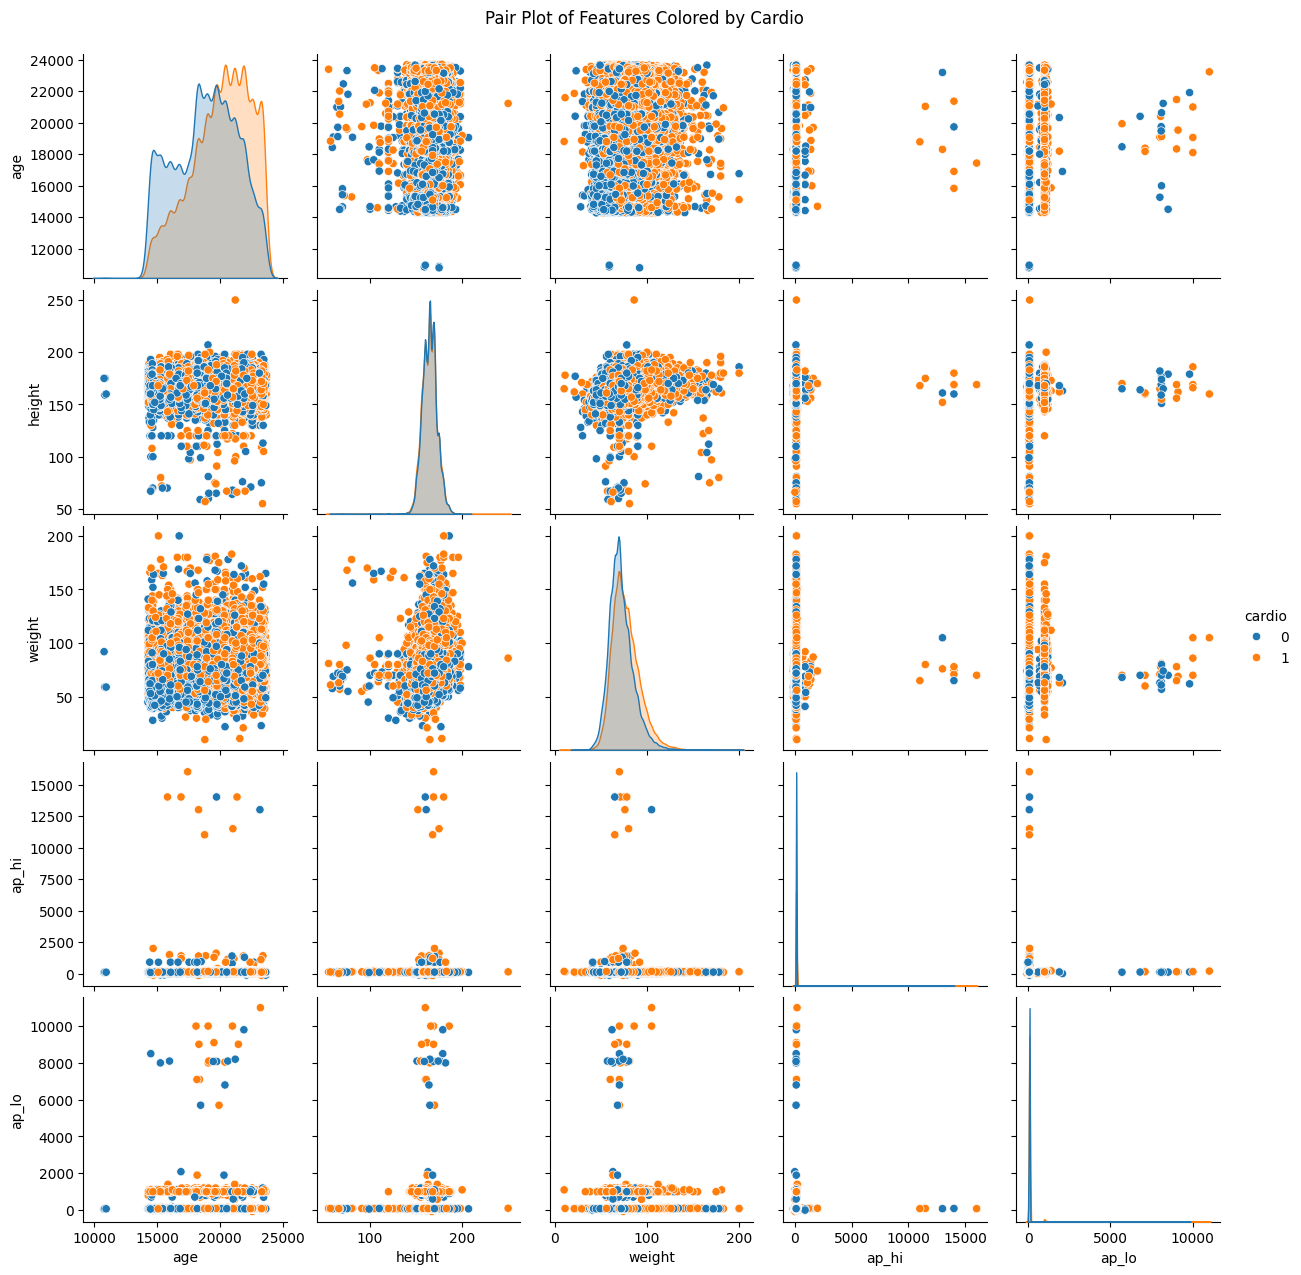

In [7]:
df_visualization = df.copy()

# Plot pairwise relationships for numerical columns
sns.pairplot(df_visualization, vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'], hue='cardio', diag_kind='kde')
plt.suptitle("Pair Plot of Features Colored by Cardio", y=1.02)
plt.show()

In [8]:
#PREPROCESSING

import sklearn.preprocessing

new_df = df.copy()

new_df['bmi'] = new_df['weight'] / ((new_df['height'] / 100) ** 2)

#one hot encode the features
categorical_features = ['gender', 'cholesterol', 'gluc']
numerical_columns = new_df.columns
numerical_columns = numerical_columns.drop(categorical_features)
new_df = pd.get_dummies(new_df, columns=categorical_features)

#drop target before standardizing
numerical_columns = numerical_columns.drop('cardio')

# #standardize features
scaler = sklearn.preprocessing.StandardScaler()
new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])


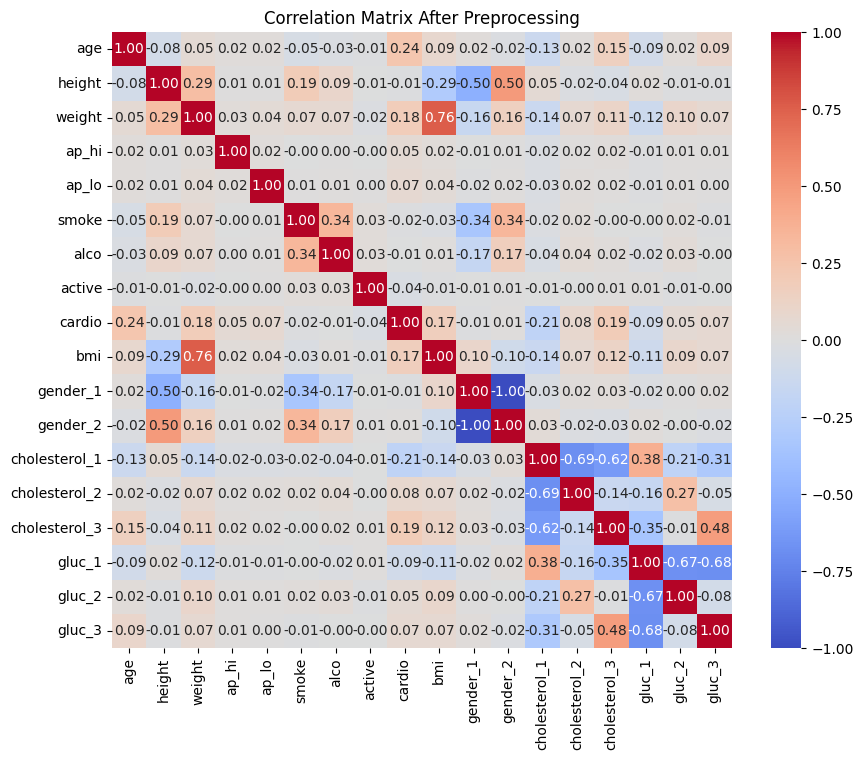

In [9]:
# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix After Preprocessing")
plt.show()

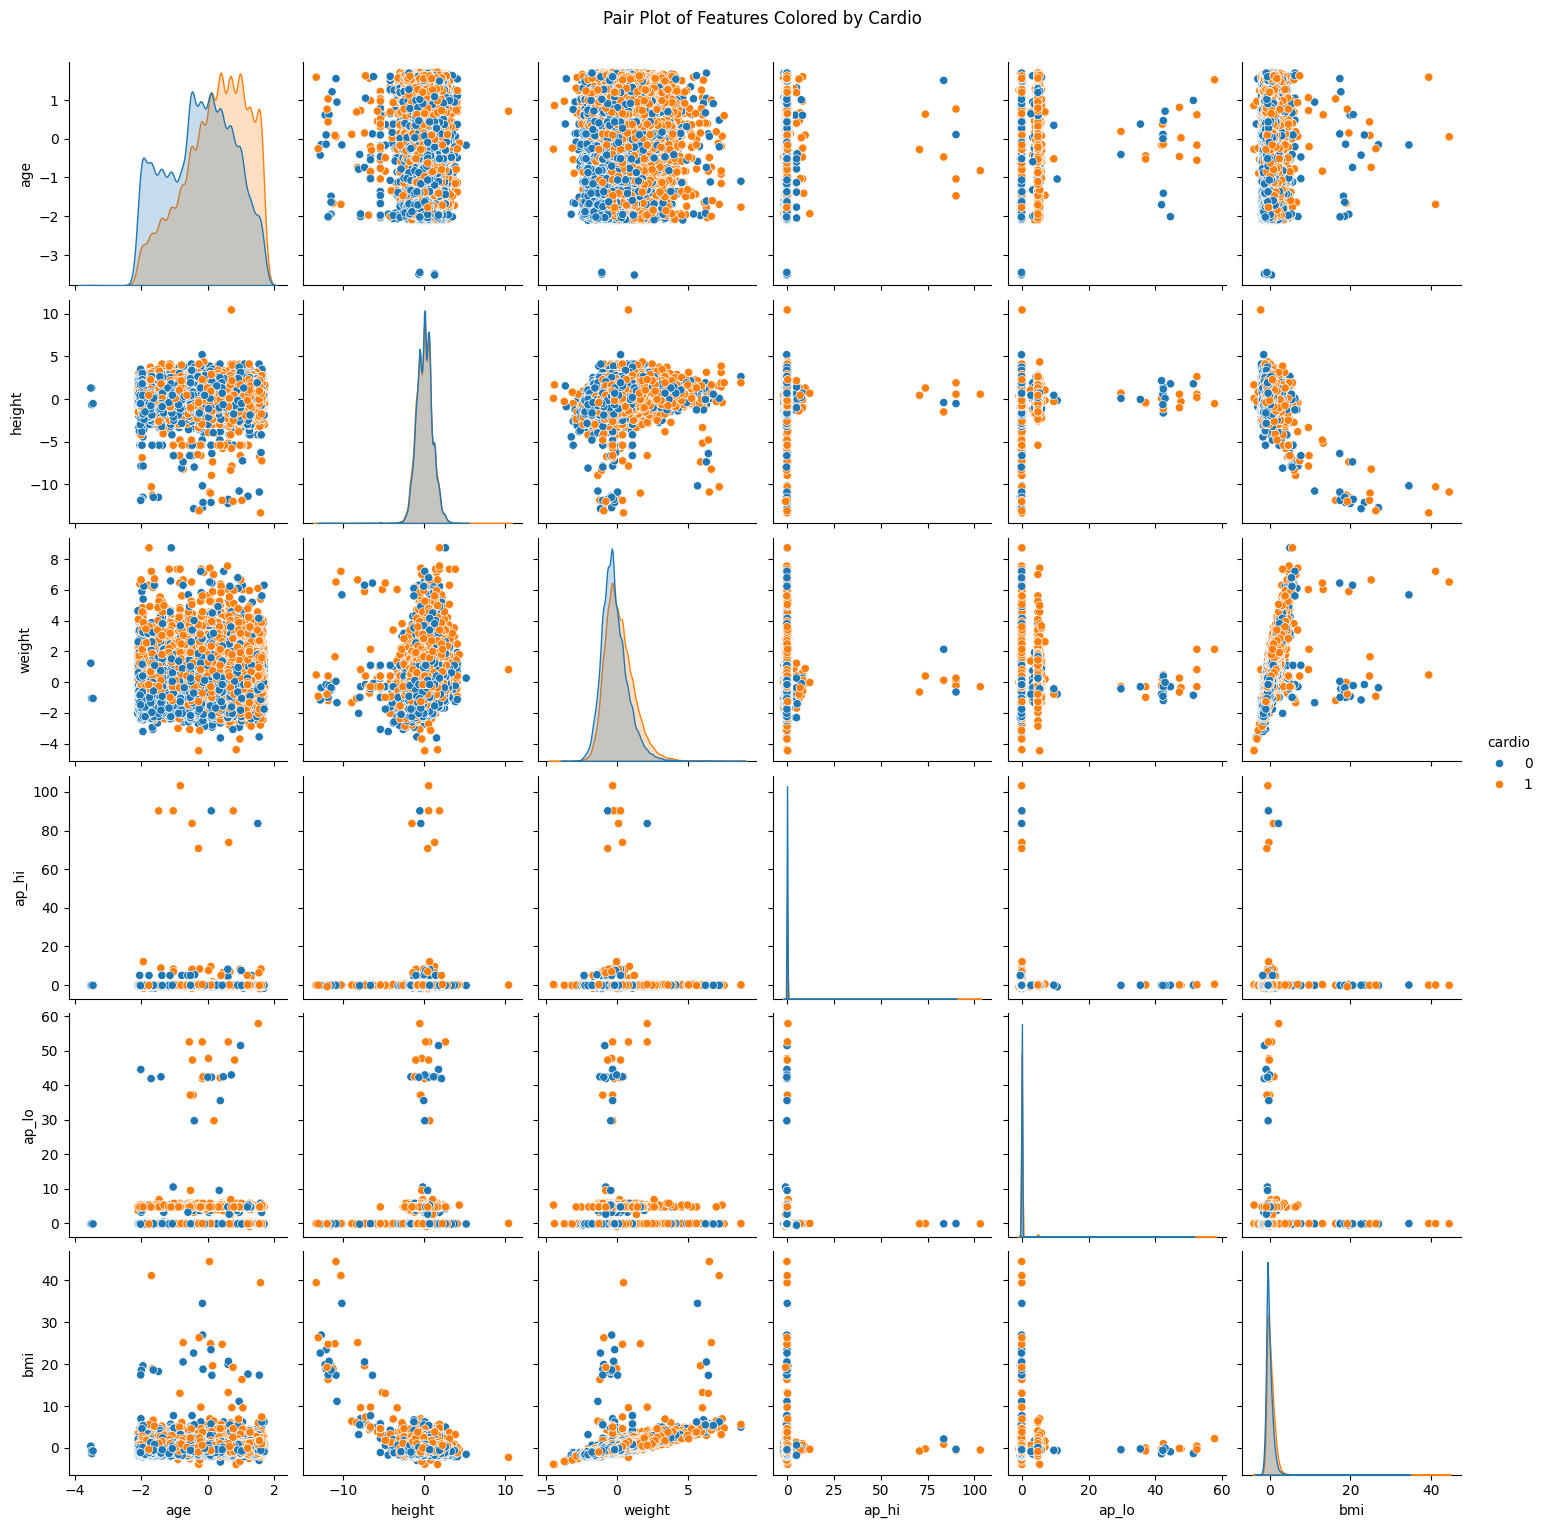

In [10]:
new_df_visualization = new_df.copy()

# Plot pairwise relationships for numerical columns
sns.pairplot(new_df_visualization, vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi'], hue='cardio', diag_kind='kde')
plt.suptitle("Pair Plot of Features Colored by Cardio", y=1.02)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
X = new_df.drop(columns='cardio')
y = new_df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

search_logistic_model = LogisticRegression(random_state=42)

param_dist = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['balanced', None], 
    'max_iter': [100, 200, 500]  
}

random_search = RandomizedSearchCV(
    search_logistic_model, param_distributions=param_dist, n_iter=10, cv=3,
    scoring='accuracy', verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_params = random_search.best_params_


logistic_model = LogisticRegression(**best_params, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 10}
Logistic Regression Accuracy: 0.7218571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000


Confusion Matrix:
 [[5345 1643]
 [2251 4761]]


In [22]:
gs_rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True],  
    'class_weight': ['balanced'] 
}


random_search = RandomizedSearchCV(
    gs_rf_model, param_distributions=param_grid, n_iter=10, cv=3,
    scoring='accuracy', verbose=1, random_state=42, n_jobs=-1
)


random_search.fit(X_train, y_train)



print("Best Parameters:", random_search.best_params_)

best_params = random_search.best_params_

rf_model = RandomForestClassifier(**best_params, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': True}
Random Forest Accuracy: 0.7396428571428572

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.77      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000


Confusion Matrix:
 [[5550 1438]
 [2207 4805]]
